In [64]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

df = pd.read_csv(r'S:\Data\complaints.csv', low_memory=False)

df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-14,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",CA,90047,NaN,NaN,Web,2022-11-14,In progress,Yes,NaN,6197918
1,2022-10-29,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,FIRSTBANK,CO,81631,NaN,NaN,Web,2022-10-29,Untimely response,No,NaN,6144605
2,2022-10-29,Debt collection,Mortgage debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,State Home Mortgage,GA,30035,NaN,NaN,Web,2022-10-29,Untimely response,No,NaN,6144650
3,2022-10-29,"Credit reporting, credit repair services, or o...",Credit reporting,Unable to get your credit report or credit score,Other problem getting your report or credit score,NaN,NaN,"Credit Karma, LLC",GA,30122,NaN,NaN,Web,2022-10-29,Untimely response,No,NaN,6145700
4,2022-11-11,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19148,NaN,NaN,Web,2022-11-11,In progress,Yes,NaN,6197538


In [65]:
#Organize headers and remove any other unwanted symbols and replace with underscore
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ','_').str.replace('-','_')
df.columns = df.columns.str.strip('?!.&^*()$#@')
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [66]:
#Lets see how much data we're working with
df.shape

(3071688, 18)

<AxesSubplot:>

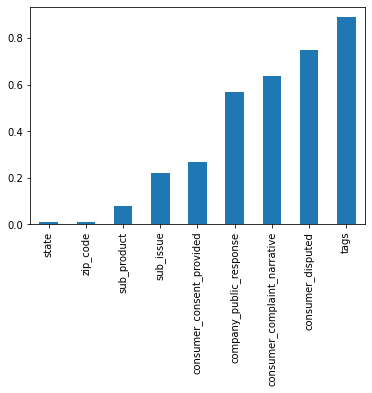

In [67]:
# df['date_received'] = pd.to_datetime(df['date_received'])
#Let's get a percentage of each column that is null
missing = round(df.isnull().sum()/df.shape[0],2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [68]:
#Let's drop the columns with large amounts of nulls, then see how many unique values exist. Since most of this data is categorical, we can fillna with 'Unkown' in this instance
df = df.drop(['consumer_complaint_narrative','company_public_response','tags','consumer_disputed'], axis=1)
df = df.fillna('Unknown')
df.nunique()

date_received                      4000
product                              18
sub_product                          77
issue                               165
sub_issue                           222
company                            6560
state                                64
zip_code                          34495
consumer_consent_provided             5
submitted_via                         7
date_sent_to_company               3949
company_response_to_consumer          9
timely_response                       2
complaint_id                    3071688
dtype: int64

In [70]:
#Graph and Outputs
import numpy as np

product = pd.DataFrame(df.groupby('product')['complaint_id'].count()).sort_values(by='complaint_id',ascending=False)[:20]
product = product.sort_values(by='complaint_id',ascending=True)
product = product.reset_index()


sub_product = pd.DataFrame(df.groupby('sub_product')['complaint_id'].count()).sort_values(by='complaint_id',ascending=False)[:20]
sub_product = sub_product.sort_values(by='complaint_id',ascending=True)
sub_product = sub_product.reset_index()


company = pd.DataFrame(df.groupby('company')['complaint_id'].count()).sort_values(by='complaint_id',ascending=False)[:20]
company = company.sort_values(by='complaint_id',ascending=True)
company = company.reset_index()


issue = pd.DataFrame(df.groupby('issue')['complaint_id'].count()).sort_values(by='complaint_id',ascending=False)[:20]
issue = issue.sort_values(by='complaint_id',ascending=True)
issue = issue.reset_index()


sub_issue = pd.DataFrame(df.groupby('sub_issue')['complaint_id'].count()).sort_values(by='complaint_id',ascending=False)[:20]
sub_issue = sub_issue.sort_values(by='complaint_id',ascending=True)
sub_issue = sub_issue.reset_index()

percent_untimely = round(df['timely_response'].loc[df['timely_response'] == 'Yes'].count()/df['timely_response'].count(),3)*100

##Plot Bar Charts to Visualize

fig = px.bar(product,x='complaint_id',y='product',title='Consumer Financial Complaints by Product',labels={'complaint_id': 'Number of Complaints','product': 'Product Type'},height=600,width=1400, color='complaint_id', color_continuous_scale='Viridis',orientation='h')
fig.show()

fig = px.bar(sub_product,x='complaint_id',y='sub_product',title='Consumer Financial Complaints by Sub-Product',labels={'complaint_id': 'Number of Complaints','sub_product': 'Sub Product Type'},height=600,width=1400, color='complaint_id', color_continuous_scale='Viridis',orientation='h')
fig.show()

fig = px.bar(company,x='complaint_id',y='company',title='Consumer Financial Complaints by Company',labels={'complaint_id': 'Number of Complaints','company': 'Company'},height=600,width=1400, color='complaint_id', color_continuous_scale='Viridis',orientation='h')
fig.show()

fig = px.bar(issue,x='complaint_id',y='issue',title='Consumer Financial Complaints by Issue',labels={'complaint_id': 'Number of Complaints','issuet': 'Issue'},height=600,width=1400, color='complaint_id', color_continuous_scale='Viridis',orientation='h')
fig.show()

fig = px.bar(sub_issue,x='complaint_id',y='sub_issue',title='Consumer Financial Complaints by Sub-Issue',labels={'complaint_id': 'Number of Complaints','sub_issue': 'Sub-Issue'},height=600,width=1400, color='complaint_id', color_continuous_scale='Viridis',orientation='h')
fig.show()



print('Consumer financial complaints were responded to in a timely manner {}% of the time.'.format(percent_untimely))


Consumer financial complaints were responded to in a timely manner 98.4% of the time.
